# 基于线性回归算法的 Boston 房价预测模型

## 1 数据说明

|序号|属性|含义|
|:---|:---|:---|
| 1 | CRIM | 城镇人均犯罪率 |
| 2 | ZN | 住宅用地所占比例 |
| 3 | INDUS | 城镇中非住宅用地所占比例 |
| 4 | CHAS | 虚拟变量,用于回归分析 |
| 5 | NOX | 环保指数 |
| 6 | RM | 每栋住宅的房间数 |
| 7 | AGE | 1940 年以前建成的自住单位的比例 |
| 8 | DIS | 距离 5 个波士顿的就业中心的加权距离 |
| 9 | RAD | 距离高速公路的便利指数 |
| 10 | TAX | 每一万美元的不动产税率 |
| 11 | PTRATIO | 城镇中的教师学生比例 |
| 12 | B | 城镇中的黑人比例 |
| 13 | LSTAT | 地区中有多少房东属于低收入人群 |
| 14 | MEDV | 自住房屋房价中位数（也就是均价）|

利用以上特征，预估房屋的出售价格


## 2 数据读入与分析

In [1]:
# 导入工具库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# 数据集路径
data_path = "./data/boston.csv"
# 读入数据
data = pd.read_csv(data_path)
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647422   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## 3 定义特征值与目标值

选择 CRIM、RM、LSTAT 为特征值，MEDV 为目标值

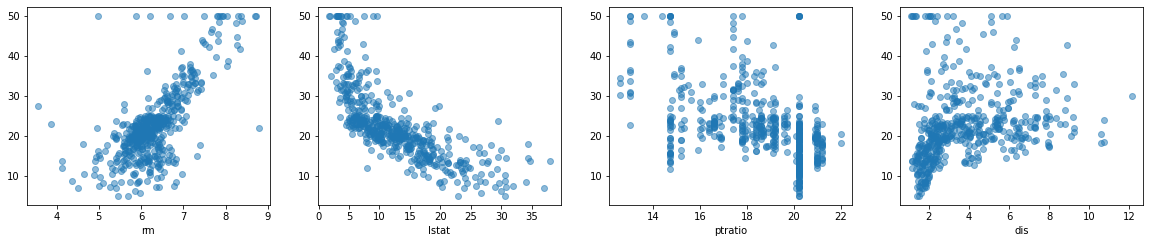

In [3]:
# 选择特征值和目标值
'''
CRIM	城镇人均犯罪率
RM	    每栋住宅的房间数
LSTAT	地区中有多少房东属于低收入人群
TAX	    每一万美元的不动产税率
'''
feature_name = ['rm', 'lstat', 'ptratio', 'dis']
# feature_name = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
dst_name = ['medv']
data_x = data[feature_name]
data_y = data[dst_name]
data_x.describe()
# 调整图像的宽高
plt.figure(figsize=(20, 8))
for i, key in enumerate(feature_name):
    plt.subplot(2, len(feature_name), i + 1)
    plt.xlabel(key)
    plt.scatter(data_x[key], data_y['medv'], alpha=0.5)

## 4 划分训练集和测试集
数据集的70%作为训练集，30%作为测试集

In [4]:
test_percent =  0.3
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=test_percent)
print("train size:{}, test size:{}".format(len(train_x), len(test_x)))

train size:354, test size:152


## 5 线性回归

In [5]:
# 定义线性回归模型
model = linear_model.LinearRegression()
# 将数据传入模型，进行拟合
model.fit(train_x, train_y)
# 打印参数
params_k = model.coef_[0]
params_b = model.intercept_[0]
print("params (ki): ", params_k)
print("params (b): ", params_b)

params (ki):  [ 4.1367973  -0.71342926 -0.93879023 -0.76935532]
params (b):  26.234944531357822


## 6 预测

In [6]:
pred_y = model.predict(test_x)
print(pd.DataFrame(pred_y).head())

           0
0  14.067755
1  20.520626
2  34.329423
3  19.804059
4  25.518725


## 7 计算误差

In [7]:
loss_mae = metrics.mean_absolute_error(test_y, pred_y)
loss_mse = metrics.mean_squared_error(test_y,pred_y)
print("LR model's mae: ", loss_mae)
print("LR model's mse: ", loss_mse)

LR model's mae:  3.662411961521486
LR model's mse:  23.837132256655998


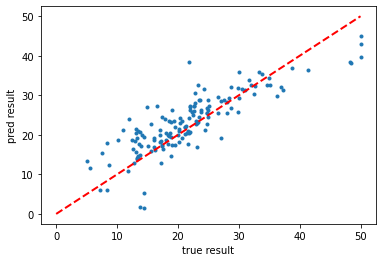

In [8]:
plt.figure('model')
plt.plot(test_y, pred_y, '.')
plt.plot([0, test_y.max()[0]], [0, test_y.max()[0]], 'r--', lw=2)
plt.xlabel('true result')
plt.ylabel('pred result')
plt.show()